<a href="https://colab.research.google.com/github/mayank-dahotre/Robotics-2024/blob/main/ITR_24_W1_Inv_and_Forward_Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-by-Step Process:
- Define the robotic arm parameters and kinematics equations.
- Compute inverse kinematics for three simple trajectories.
- Use forward kinematics to validate the calculated joint variables.
- Plot the original and recalculated trajectories.

1. Define Robotic Arm Parameters and Kinematics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lengths of the robotic arm links
L1 = 1.0
L2 = 1.0

def forward_kinematics(theta1, theta2):
    # (x, y) from theta1 and theta2
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y

def inverse_kinematics(x, y):
    # theta1 and theta2 from (x, y).
    cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    sin_theta2 = np.sqrt(1 - cos_theta2**2)  # choose positive solution
    theta2 = np.arctan2(sin_theta2, cos_theta2)
    k1 = L1 + L2 * cos_theta2
    k2 = L2 * sin_theta2
    theta1 = np.arctan2(y, x) - np.arctan2(k2, k1)
    return theta1, theta2


2. Compute Inverse Kinematics for Three Simple Trajectories
We'll use three simple trajectories:

- A straight line
- A circular arc
- A sine wave

In [ ]:
# Trajectory 1: Straight line from (1, 0) to (1, 1)
x1 = np.linspace(1, 1, 100)
y1 = np.linspace(0, 1, 100)

# Trajectory 2: Circular arc with radius 1 centered at (0.5, 0.5)
theta = np.linspace(0, np.pi / 2, 100)
x2 = 0.5 + 0.5 * np.cos(theta)
y2 = 0.5 + 0.5 * np.sin(theta)

# Trajectory 3: Sine wave from x = 0 to x = 1
x3 = np.linspace(0, 1, 100)
y3 = 0.5 * np.sin(2 * np.pi * x3)

trajectories = [(x1, y1), (x2, y2), (x3, y3)]

# Calculate inverse kinematics and then forward kinematics
recalculated_trajectories = []
for x_traj, y_traj in trajectories:
    theta1_list = []
    theta2_list = []
    x_recalc = []
    y_recalc = []

    for x, y in zip(x_traj, y_traj):
        theta1, theta2 = inverse_kinematics(x, y)
        theta1_list.append(theta1)
        theta2_list.append(theta2)

        x_calc, y_calc = forward_kinematics(theta1, theta2)
        x_recalc.append(x_calc)
        y_recalc.append(y_calc)

    recalculated_trajectories.append((x_recalc, y_recalc))


3. Plot the Original and Recalculated Trajectories

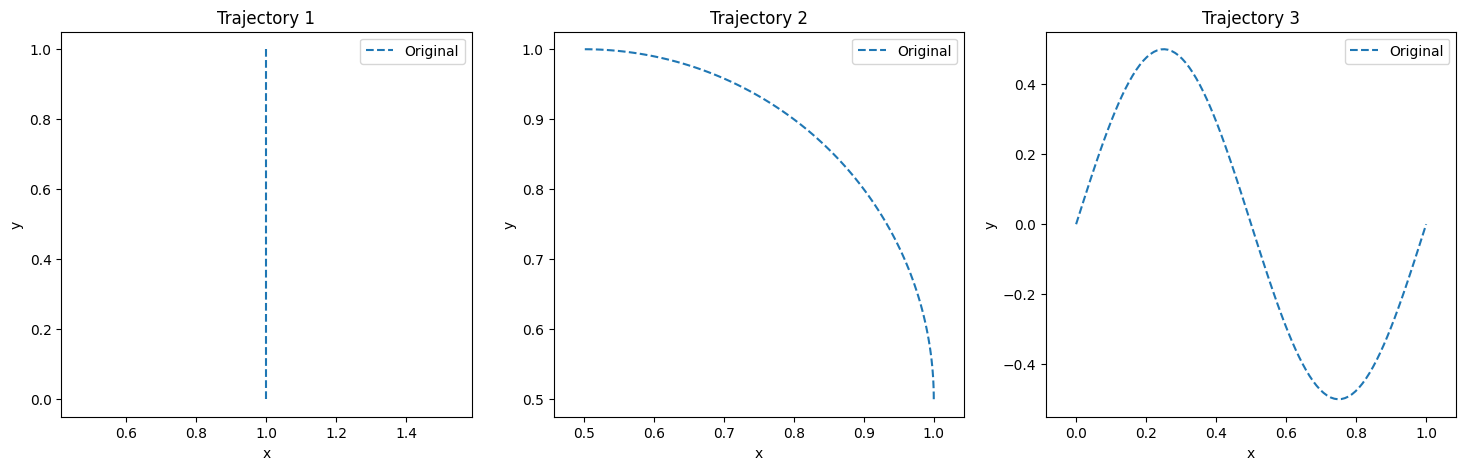

In [ ]:
# Plot the trajectories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ((x_orig, y_orig), (x_recalc, y_recalc)) in enumerate(zip(trajectories, recalculated_trajectories)):
    axes[i].plot(x_orig, y_orig, label='Original', linestyle='--')
    axes[i].set_title(f'Trajectory {i+1}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].axis('equal')

plt.show()


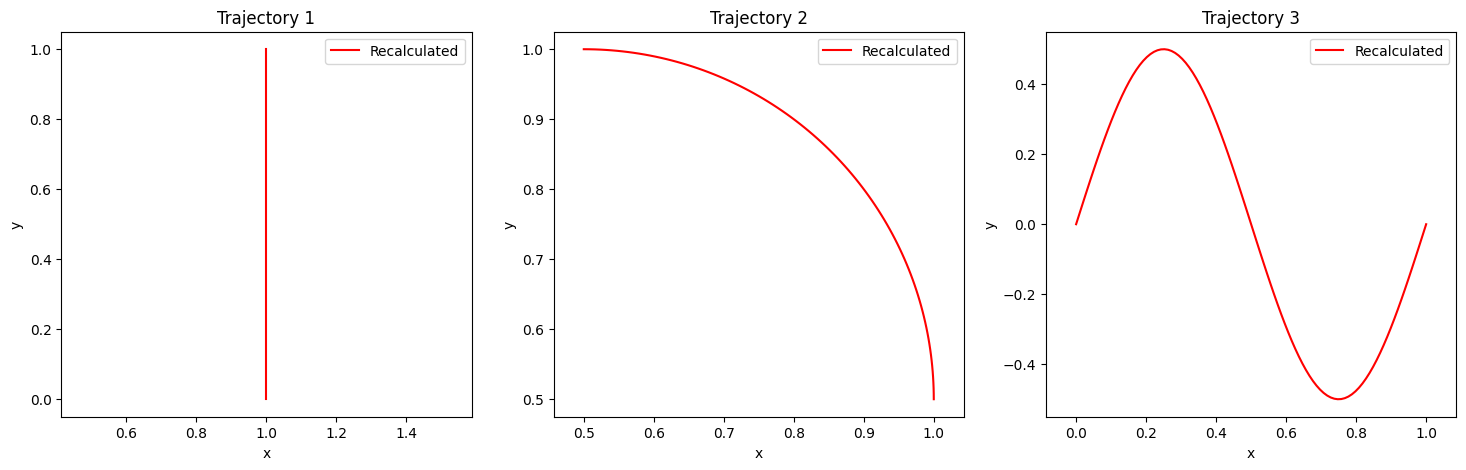

In [ ]:
# Plot the trajectories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ((x_orig, y_orig), (x_recalc, y_recalc)) in enumerate(zip(trajectories, recalculated_trajectories)):
    axes[i].plot(x_recalc, y_recalc, label='Recalculated', linestyle='-', color='red')
    axes[i].set_title(f'Trajectory {i+1}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].axis('equal')

plt.show()

Full Code

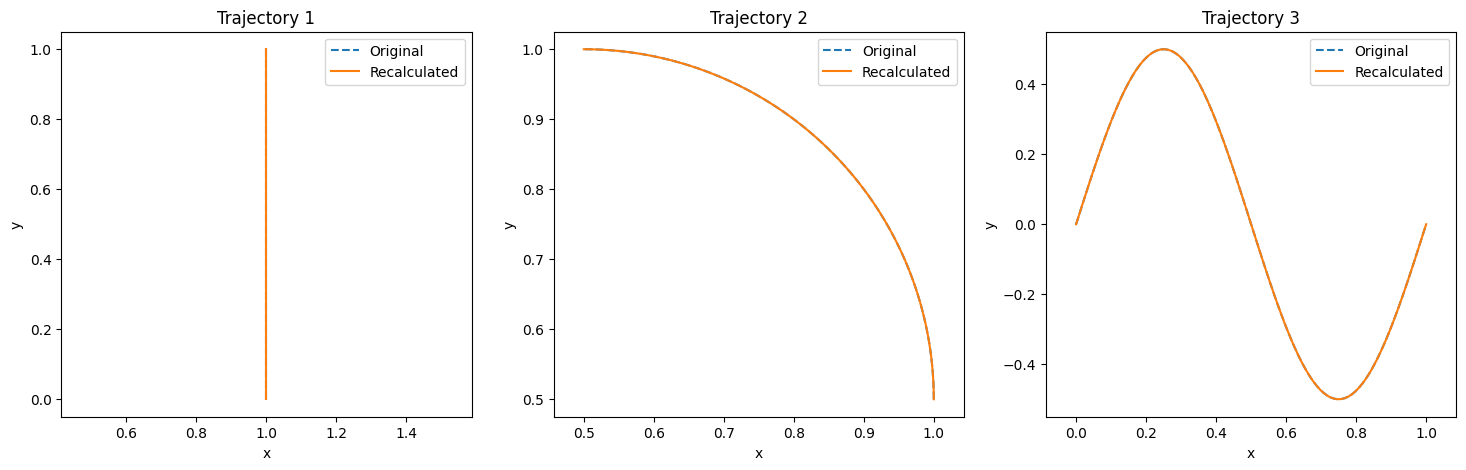

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lengths of the robotic arm links
L1 = 1.0
L2 = 1.0

def forward_kinematics(theta1, theta2):
    """Calculate the (x, y) position of the end effector given joint angles theta1 and theta2."""
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y

def inverse_kinematics(x, y):
    """Calculate the joint angles theta1 and theta2 given the (x, y) position of the end effector."""
    cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    sin_theta2 = np.sqrt(1 - cos_theta2**2)  # choose positive solution
    theta2 = np.arctan2(sin_theta2, cos_theta2)
    k1 = L1 + L2 * cos_theta2
    k2 = L2 * sin_theta2
    theta1 = np.arctan2(y, x) - np.arctan2(k2, k1)
    return theta1, theta2

# Trajectory 1: Straight line from (1, 0) to (1, 1)
x1 = np.linspace(1, 1, 100)
y1 = np.linspace(0, 1, 100)

# Trajectory 2: Circular arc with radius 1 centered at (0.5, 0.5)
theta = np.linspace(0, np.pi / 2, 100)
x2 = 0.5 + 0.5 * np.cos(theta)
y2 = 0.5 + 0.5 * np.sin(theta)

# Trajectory 3: Sine wave from x = 0 to x = 1
x3 = np.linspace(0, 1, 100)
y3 = 0.5 * np.sin(2 * np.pi * x3)

trajectories = [(x1, y1), (x2, y2), (x3, y3)]

# Calculate inverse kinematics and then forward kinematics
recalculated_trajectories = []
for x_traj, y_traj in trajectories:
    theta1_list = []
    theta2_list = []
    x_recalc = []
    y_recalc = []

    for x, y in zip(x_traj, y_traj):
        theta1, theta2 = inverse_kinematics(x, y)
        theta1_list.append(theta1)
        theta2_list.append(theta2)

        x_calc, y_calc = forward_kinematics(theta1, theta2)
        x_recalc.append(x_calc)
        y_recalc.append(y_calc)

    recalculated_trajectories.append((x_recalc, y_recalc))

# Plot the trajectories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ((x_orig, y_orig), (x_recalc, y_recalc)) in enumerate(zip(trajectories, recalculated_trajectories)):
    axes[i].plot(x_orig, y_orig, label='Original', linestyle='--')
    axes[i].plot(x_recalc, y_recalc, label='Recalculated', linestyle='-')
    axes[i].set_title(f'Trajectory {i+1}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].axis('equal')

plt.show()


- Ellipse: An elliptical trajectory centered at (0.5, 0.5) with radii 0.3 and 0.2.
- Spiral: A logarithmic spiral trajectory.
- Square: A square trajectory.

In [ ]:
# Ellipse Trajectory
t = np.linspace(0, 2 * np.pi, 100)
x1 = 0.5 + 0.3 * np.cos(t)
y1 = 0.5 + 0.2 * np.sin(t)

# Spiral
t = np.linspace(0, 4 * np.pi, 100)
r = t / (4 * np.pi)
x2 = 0.5 + r * np.cos(t)
y2 = 0.5 + r * np.sin(t)

# Square
x3 = np.concatenate([np.linspace(0.2, 0.8, 25), np.linspace(0.8, 0.8, 25), np.linspace(0.8, 0.2, 25), np.linspace(0.2, 0.2, 25)])
y3 = np.concatenate([np.linspace(0.2, 0.2, 25), np.linspace(0.2, 0.8, 25), np.linspace(0.8, 0.8, 25), np.linspace(0.8, 0.2, 25)])

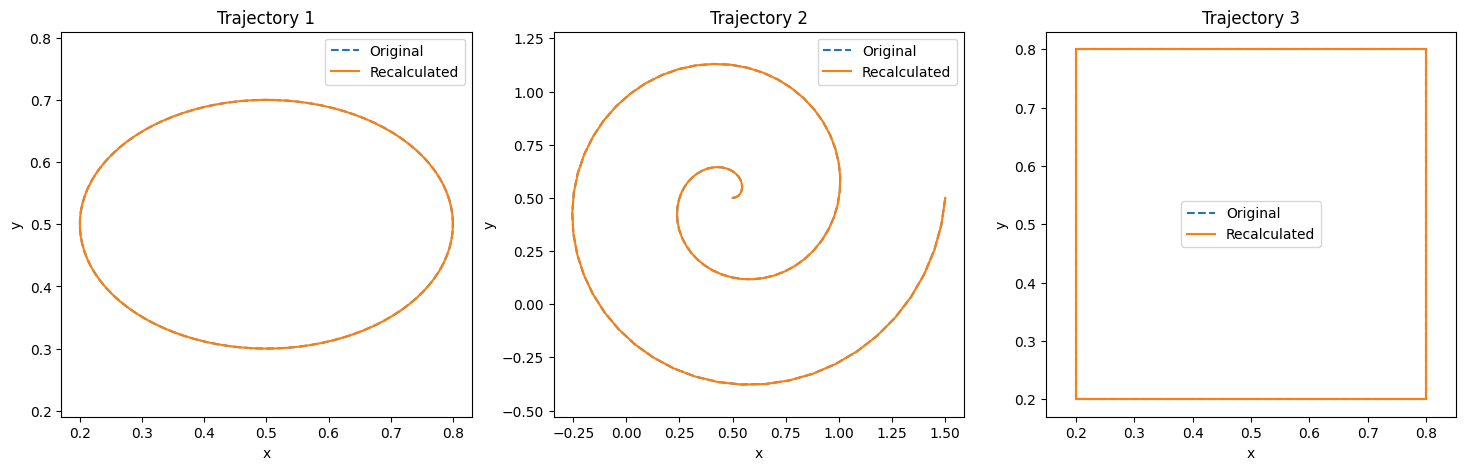

In [ ]:
# Trajectory 1: Ellipse
t = np.linspace(0, 2 * np.pi, 100)
x1 = 0.5 + 0.3 * np.cos(t)
y1 = 0.5 + 0.2 * np.sin(t)

# Trajectory 2: Spiral
t = np.linspace(0, 4 * np.pi, 100)
r = t / (4 * np.pi)
x2 = 0.5 + r * np.cos(t)
y2 = 0.5 + r * np.sin(t)

# Trajectory 3: Square
x3 = np.concatenate([np.linspace(0.2, 0.8, 25), np.linspace(0.8, 0.8, 25), np.linspace(0.8, 0.2, 25), np.linspace(0.2, 0.2, 25)])
y3 = np.concatenate([np.linspace(0.2, 0.2, 25), np.linspace(0.2, 0.8, 25), np.linspace(0.8, 0.8, 25), np.linspace(0.8, 0.2, 25)])

trajectories = [(x1, y1), (x2, y2), (x3, y3)]

# Calculate inverse kinematics and then forward kinematics
recalculated_trajectories = []
for x_traj, y_traj in trajectories:
    theta1_list = []
    theta2_list = []
    x_recalc = []
    y_recalc = []

    for x, y in zip(x_traj, y_traj):
        theta1, theta2 = inverse_kinematics(x, y)
        theta1_list.append(theta1)
        theta2_list.append(theta2)

        x_calc, y_calc = forward_kinematics(theta1, theta2)
        x_recalc.append(x_calc)
        y_recalc.append(y_calc)

    recalculated_trajectories.append((x_recalc, y_recalc))

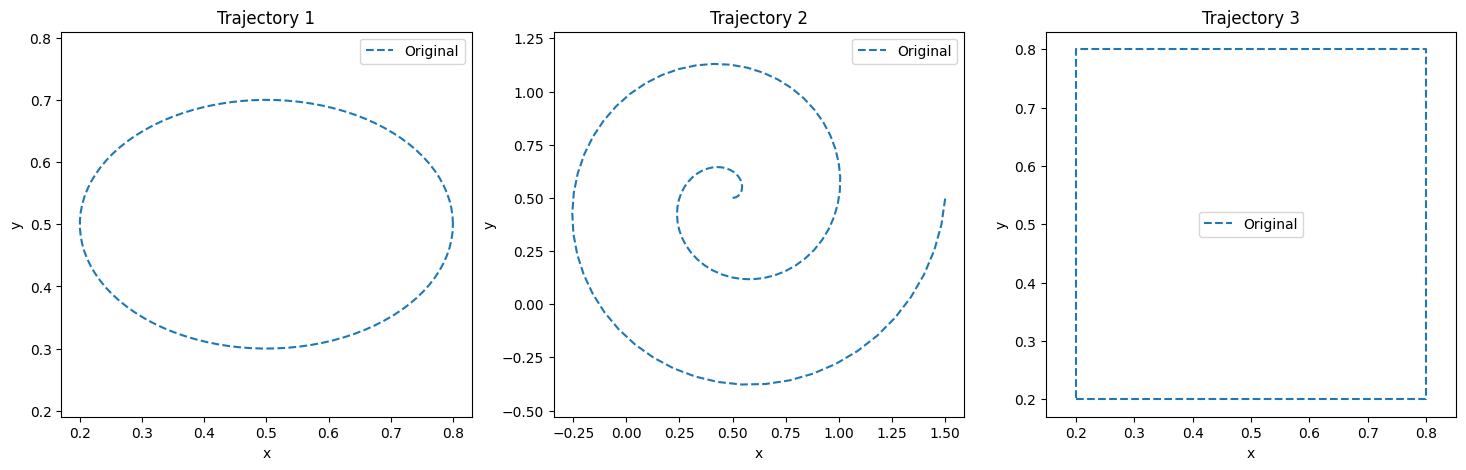

In [ ]:

# Plot the trajectories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ((x_orig, y_orig), (x_recalc, y_recalc)) in enumerate(zip(trajectories, recalculated_trajectories)):
    axes[i].plot(x_orig, y_orig, label='Original', linestyle='--')
    # axes[i].plot(x_recalc, y_recalc, label='Recalculated', linestyle='-')
    axes[i].set_title(f'Trajectory {i+1}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].axis('equal')

plt.show()

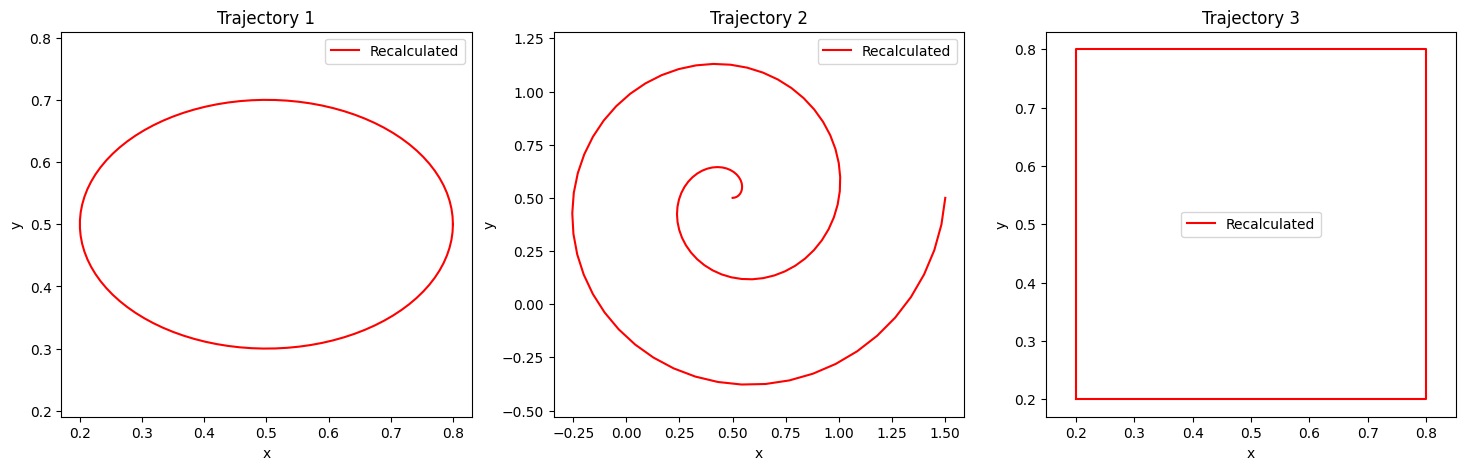

In [ ]:

# Plot the trajectories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ((x_orig, y_orig), (x_recalc, y_recalc)) in enumerate(zip(trajectories, recalculated_trajectories)):
    # axes[i].plot(x_orig, y_orig, label='Original', linestyle='--')
    axes[i].plot(x_recalc, y_recalc, label='Recalculated', linestyle='-', color = 'red')
    axes[i].set_title(f'Trajectory {i+1}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].axis('equal')

plt.show()